### Notebook for the processing and exploratory analysis of the [10X Genomics Xenium Breast Cancer](https://www.10xgenomics.com/products/xenium-in-situ/human-breast-dataset-explorer) Rep 1 and Rep 2 data. 

- **Developed by**: Carlos Talavera-López Ph.D
- **Würzburg Institute for Systems Immunology (WüSI) & Julius-Maximilian-Universität Würzburg**
- **Created**: 230619
- **Last modified**: 230619

### Load required packages

In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import squidpy as sq
import seaborn as sns
import matplotlib.pyplot as plt

### Set up wortking environment 

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 200, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'svg', fontsize = 8)

-----
anndata     0.9.1
scanpy      1.9.3
-----
PIL                 9.5.0
appnope             0.1.3
asciitree           NA
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cloudpickle         2.2.1
colorama            0.4.6
comm                0.1.3
cycler              0.10.0
cython_runtime      NA
cytoolz             0.12.0
dask                2023.6.0
dask_image          2023.03.0
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
docrep              0.3.2
entrypoints         0.4
executing           1.2.0
fasteners           0.17.3
h5py                3.8.0
hypergeom_ufunc     NA
igraph              0.10.4
imagecodecs         2023.1.23
imageio             2.31.1
importlib_resources NA
ipykernel           6.23.1
ipywidgets          8.0.6
jedi                0.18.2
jinja2              3.1.2
joblib              1.2.0
kiwisolver          1.4.4
lazy_loader         NA
leidenalg           0.9.1
llvmlite            0.38

### Read in Xenium dataset

- Replicate 1

In [3]:
adata_1 = sc.read_10x_h5(
    filename="../../datasets/xenium/rep_1/outs/cell_feature_matrix.h5"
)
adata_1

reading ../../datasets/xenium/rep_1/outs/cell_feature_matrix.h5
 (0:00:00)


AnnData object with n_obs × n_vars = 167780 × 313
    var: 'gene_ids', 'feature_types', 'genome'

In [4]:
df_1 = pd.read_csv(
    "../../datasets/xenium/rep_1/outs/cells.csv"
)
df_1.head()

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,total_counts,cell_area,nucleus_area
0,1,847.259912,326.191365,28,1,0,29,58.387031,26.642187
1,2,826.341995,328.031830,94,0,0,94,197.016719,42.130781
2,3,848.766919,331.743187,9,0,0,9,16.256250,12.688906
3,4,824.228409,334.252643,11,0,0,11,42.311406,10.069844
4,5,841.357538,332.242505,48,0,0,48,107.652500,37.479687


In [5]:
df_1.set_index(adata_1.obs_names, inplace=True)
adata_1.obs = df_1.copy()
adata_1.obsm["spatial"] = adata_1.obs[["x_centroid", "y_centroid"]].copy().to_numpy()
adata_1.obs.head()

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,total_counts,cell_area,nucleus_area
1,1,847.259912,326.191365,28,1,0,29,58.387031,26.642187
2,2,826.341995,328.031830,94,0,0,94,197.016719,42.130781
3,3,848.766919,331.743187,9,0,0,9,16.256250,12.688906
4,4,824.228409,334.252643,11,0,0,11,42.311406,10.069844
5,5,841.357538,332.242505,48,0,0,48,107.652500,37.479687


- Replicate 2

In [6]:
adata_2 = sc.read_10x_h5(
    filename="../../datasets/xenium/rep_2/outs/cell_feature_matrix.h5"
)
adata_2

reading ../../datasets/xenium/rep_2/outs/cell_feature_matrix.h5
 (0:00:00)


AnnData object with n_obs × n_vars = 118752 × 313
    var: 'gene_ids', 'feature_types', 'genome'

In [7]:
df_2 = pd.read_csv(
    "../../datasets/xenium/rep_2/outs/cells.csv"
)
df_2.head()

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,total_counts,cell_area,nucleus_area
0,1,479.934467,869.789633,207,0,0,207,166.310469,44.343438
1,2,481.256989,851.689365,147,0,0,147,218.420781,37.253906
2,3,490.647247,855.816202,165,0,0,165,110.723125,42.717813
3,4,491.177719,866.842908,186,0,0,186,181.482969,63.354219
4,5,492.839691,842.511191,82,0,0,82,152.989375,17.204531


In [8]:
df_2.set_index(adata_2.obs_names, inplace = True)
adata_2.obs = df_2.copy()
adata_2.obsm["spatial"] = adata_2.obs[["x_centroid", "y_centroid"]].copy().to_numpy()
adata_2.obs.head()

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,total_counts,cell_area,nucleus_area
1,1,479.934467,869.789633,207,0,0,207,166.310469,44.343438
2,2,481.256989,851.689365,147,0,0,147,218.420781,37.253906
3,3,490.647247,855.816202,165,0,0,165,110.723125,42.717813
4,4,491.177719,866.842908,186,0,0,186,181.482969,63.354219
5,5,492.839691,842.511191,82,0,0,82,152.989375,17.204531


- Concatenate both objects

In [9]:
adata = adata_1.concatenate(adata_2, batch_key = 'replicates', batch_categories = ['Rep_1', 'Rep_2'], join = 'inner')
adata

/Users/cartalop/mambaforge/envs/squidpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


AnnData object with n_obs × n_vars = 286532 × 313
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'replicates'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'

### Perform basic QC analysis _á la Squidpy_

In [10]:
sc.pp.calculate_qc_metrics(adata, percent_top = (10, 20, 50, 150), inplace = True)

- Calculate percentage of control probes and control codewords

In [11]:
cprobes = (
    adata.obs["control_probe_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
cwords = (
    adata.obs["control_codeword_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
print(f"Negative DNA probe count % : {cprobes}")
print(f"Negative decoding count % : {cwords}")

Negative DNA probe count % : 0.06707486296465286
Negative decoding count % : 0.006350175832931396


- Plot distribution of total transcripts per cell, unique transcripts per cell, area of segmented cells and the ratio of nuclei area to their cells

<Axes: title={'center': 'Nucleus ratio'}, ylabel='Count'>

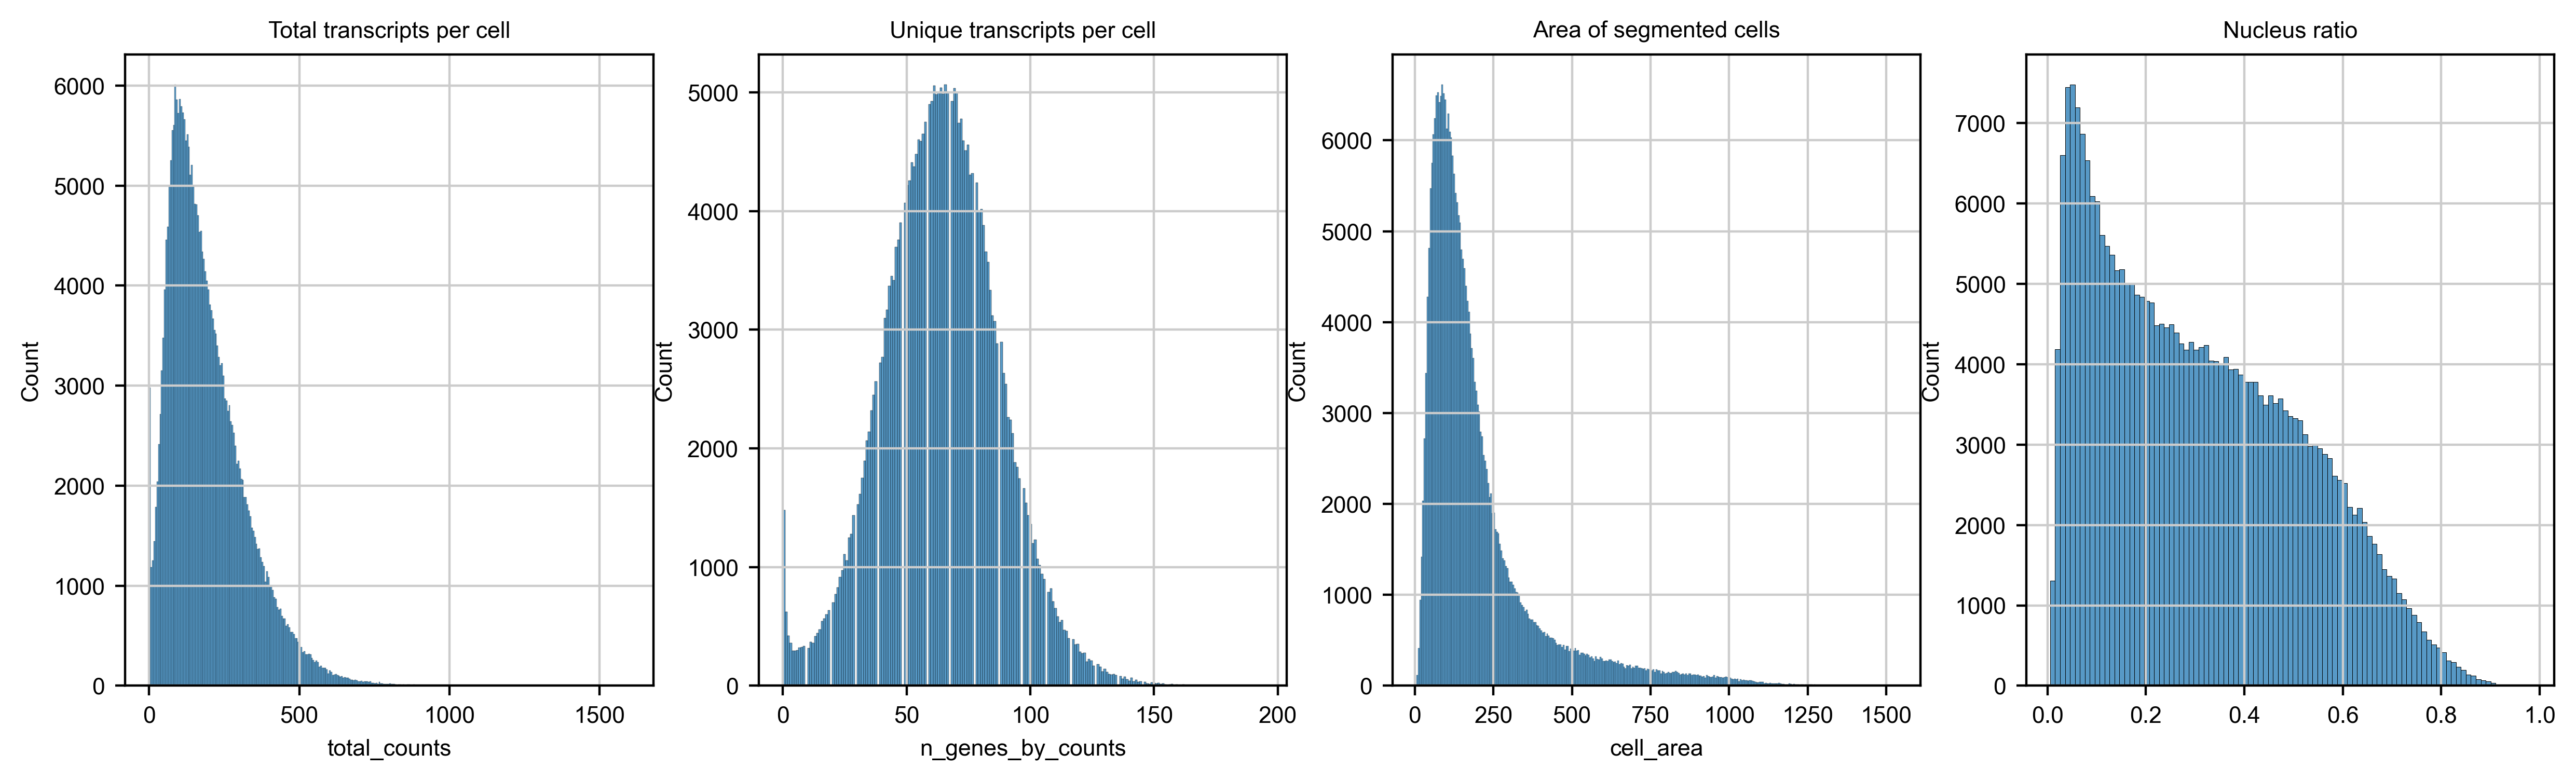

In [12]:
fig, axs = plt.subplots(1, 4, figsize = (15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
)


axs[2].set_title("Area of segmented cells")
sns.histplot(
    adata.obs["cell_area"],
    kde=False,
    ax=axs[2],
)

axs[3].set_title("Nucleus ratio")
sns.histplot(
    adata.obs["nucleus_area"] / adata.obs["cell_area"],
    kde=False,
    ax=axs[3],
)

### Filter out cells

In [13]:
sc.pp.filter_cells(adata, min_counts = 10)
sc.pp.filter_cells(adata, min_genes = 3)
sc.pp.filter_genes(adata, min_counts = 1)
sc.pp.filter_genes(adata, min_cells = 2)
adata

filtered out 4162 cells that have less than 10 counts
filtered out 7 cells that have less than 3 genes expressed


AnnData object with n_obs × n_vars = 282363 × 313
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'replicates', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'n_cells'
    obsm: 'spatial'

### Normalise data and tranform data

In [14]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, inplace = True)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


### Visualise manifold

In [15]:
sc.pp.pca(adata, n_comps = 50, random_state = 1712)
sc.pp.neighbors(adata, n_neighbors = 50, random_state = 1769, method = 'umap')
sc.tl.leiden(adata, resolution = 1.5, random_state = 1786)
sc.tl.umap(adata, min_dist = 0.3, spread = 2, random_state = 1789)

computing PCA
    with n_comps=50
    finished (0:00:07)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:58)
running Leiden clustering


In [ ]:
sc.pl.umap(
    adata,
    color = [
        "total_counts",
        "n_genes_by_counts",
        "leiden",
    ],
    wspace = 0.4,
    frameon = False, 
    size = 1
)

### Characterise clusters

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method = 'wilcoxon', n_genes = 100, use_raw = False)
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
markers_cells = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals_adj', 'logfoldchanges']})
markers_cells.head(5)

In [ ]:
markers_cells.to_csv('BRCA_Xenium_ALL_WilcoxRST_top100.csv', sep = ',', index = False)

In [ ]:
adata.obs['leiden'].cat.categories

In [ ]:
adata.obs['cell_states'] = adata.obs['leiden'].copy()
adata.obs['cell_states'] = adata.obs['cell_states'].cat.rename_categories(['Epi1_FOXA1+', 'adipo_FB', 'M2MΦ', 'EC_CLEC14A+', 'CTL4+CD4+T', 'Epi1_CEACAM6+', 'tcm_CD4+T', 'Epi_AGR3+', 'FB_GJB2+', 'FB_SFRP4+', 'CD69+CD8+T', 'Epi2_FOXA1+', 'Epi_MYH11+',
       'DERL3+B', 'MMP12+CD14+Mo', 'BANK1+B', 'Epi_KRT23+', 'Epi2_CEACAM6+', 'CD8+T', 'ADIPOQ+FB'])
sc.pl.umap(adata, color = ['cell_states'], size = 0.8, legend_fontsize = 6, legend_loc = 'on data', frameon = False)

### Export object

In [ ]:
adata

In [ ]:
adata.write('../../datasets/xenium/Xenium_FFPE_Human_Breast_Cancer_ALL_annotated_ctl230619.h5ad')